Dataset Preview:
                              Product Name  \
0    OPPO Reno10 5G (Silvery Grey, 256 GB)   
1  Infinix Smart 7 HD (Green Apple, 64 GB)   
2      Infinix SMART 7 (Azure Blue, 64 GB)   
3              POCO C55 (Cool Blue, 64 GB)   
4          POCO C50 (Country Green, 32 GB)   

                                         Product Url   Prices         Rating  \
0  https://www.flipkart.com/oppo-reno10-5g-silver...  ₹32,999  Not Available   
1  https://www.flipkart.com/infinix-smart-7-hd-gr...   ₹6,199            4.3   
2  https://www.flipkart.com/infinix-smart-7-azure...   ₹7,299            4.3   
3  https://www.flipkart.com/poco-c55-cool-blue-64...   ₹8,499            4.2   
4  https://www.flipkart.com/poco-c50-country-gree...   ₹5,499            4.2   

  Number of Review  
0                0  
1              630  
2            2,400  
3            2,027  
4            2,039  


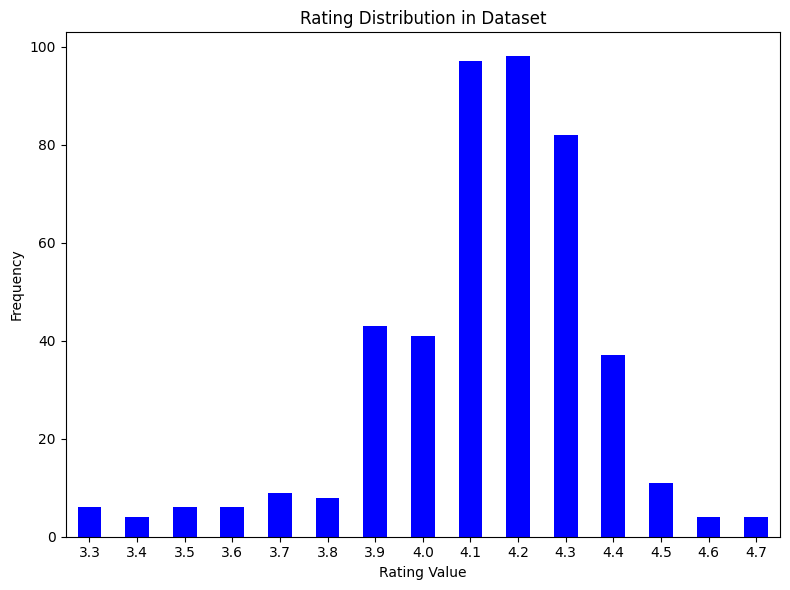

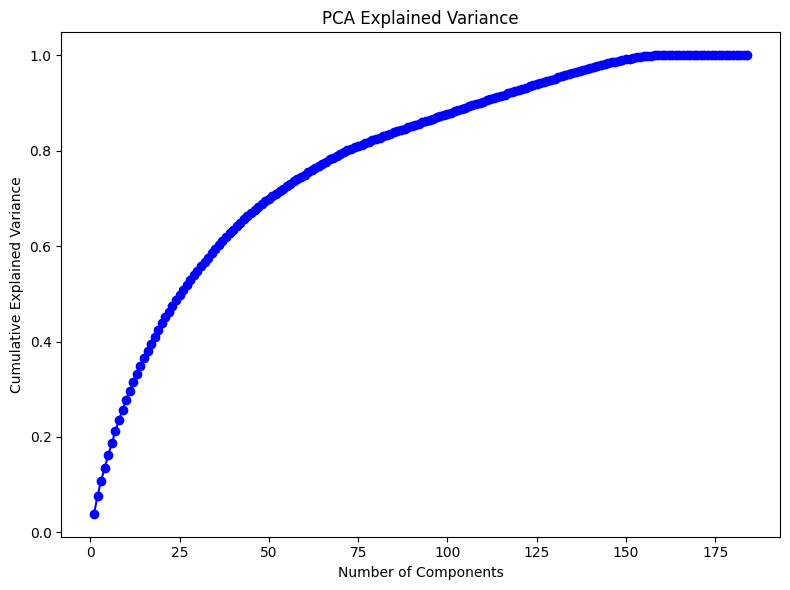

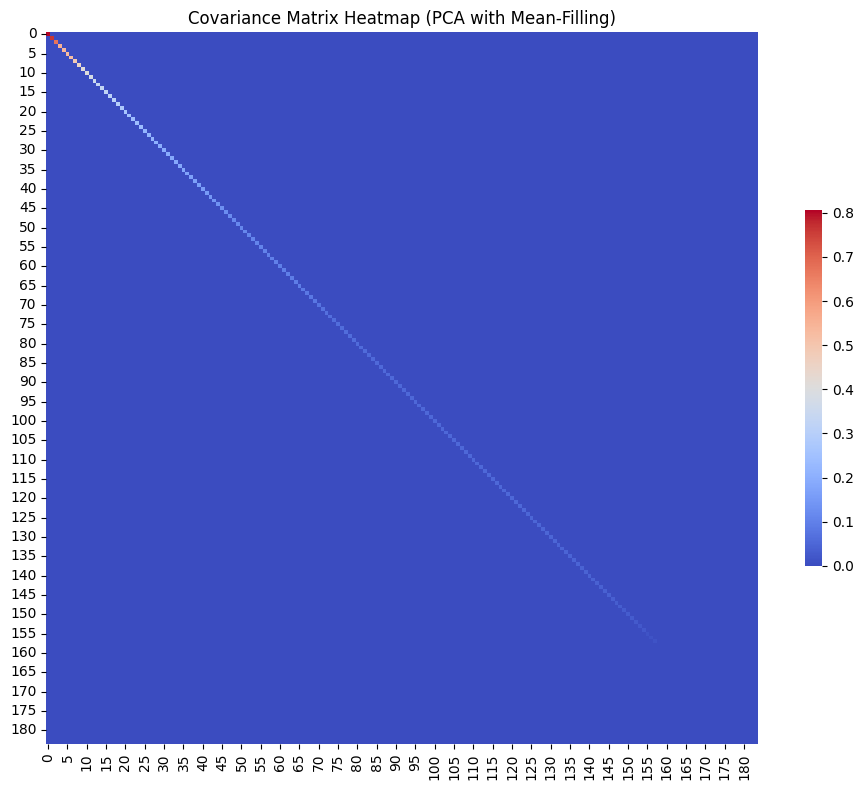

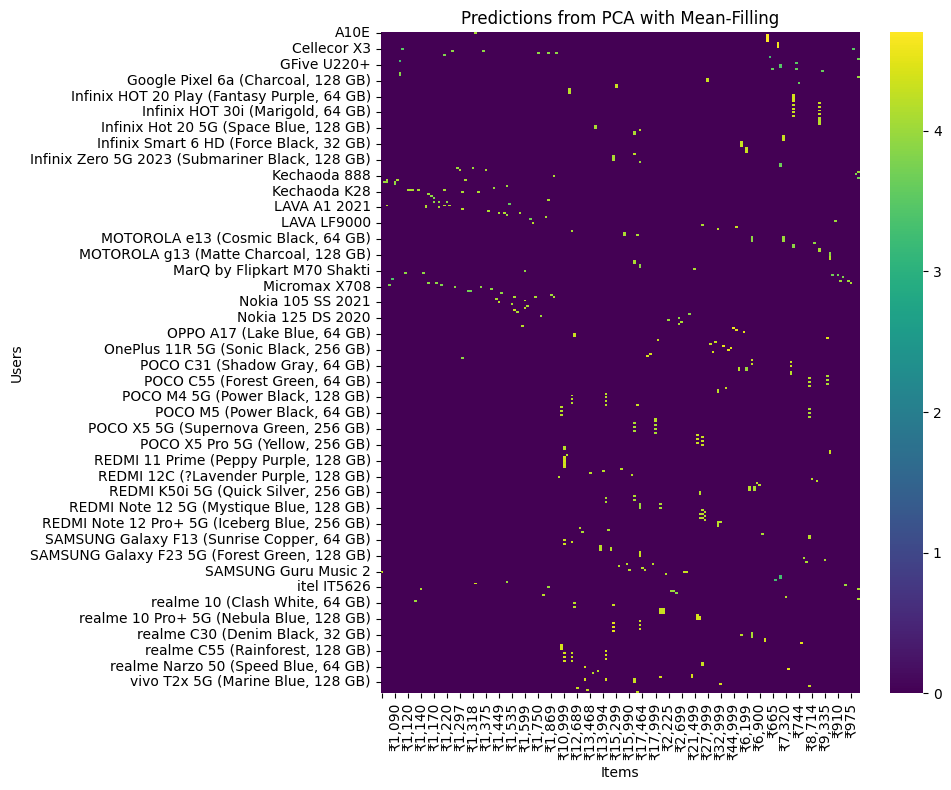

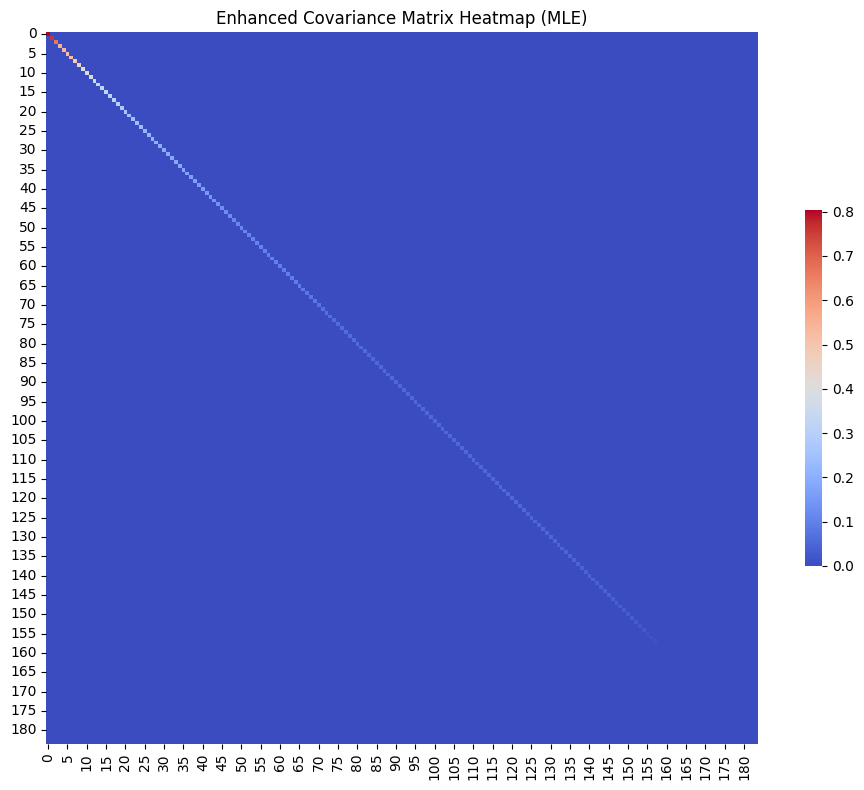

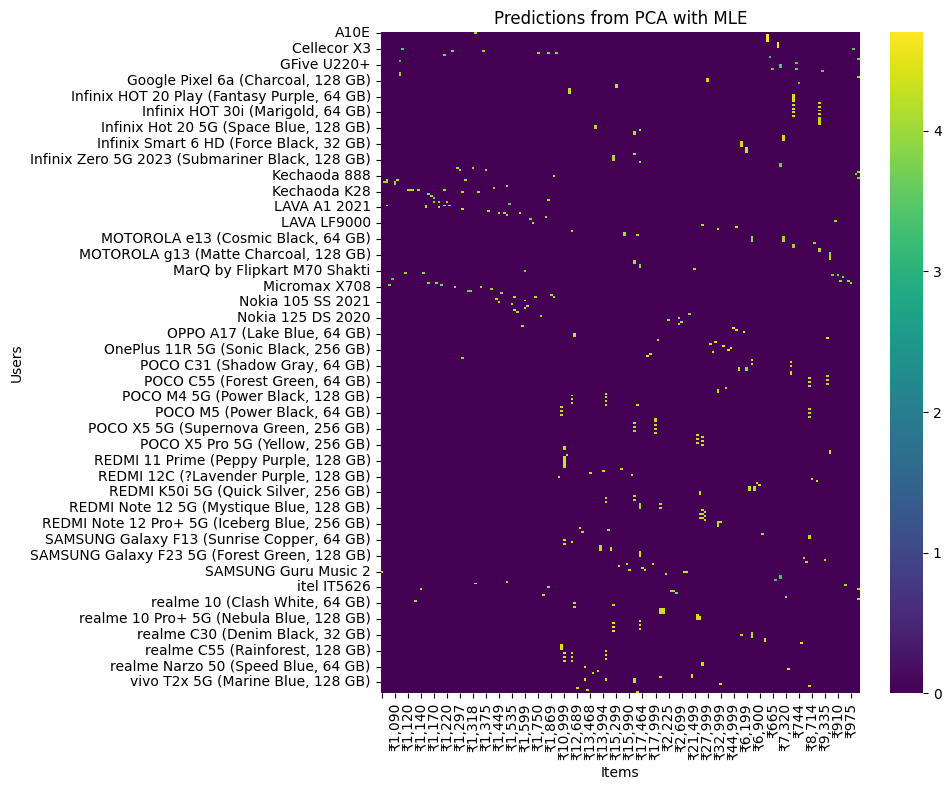

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the dataset
dataset_path = "221101426_sondosGhoniem_dataset.csv"  # Replace with the dataset filename
ratings = pd.read_csv(dataset_path)

# Display the first few rows to confirm loading
print("Dataset Preview:")
print(ratings.head())

# Ensure that the "Rating" column exists and is numeric
if "Rating" in ratings.columns:
    ratings["Rating"] = pd.to_numeric(ratings["Rating"], errors="coerce")
    ratings = ratings.dropna(subset=["Rating"])
    ratings["Rating"] = ratings["Rating"].astype(float)
else:
    raise KeyError("The 'Rating' column is missing from the dataset.")

# Ensure other required columns are present
required_columns = ["Product Name", "Prices"]
for column in required_columns:
    if column not in ratings.columns:
        raise KeyError(f"The '{column}' column is missing from the dataset.")

# 1. Distribution of Ratings
rating_distribution = ratings["Rating"].value_counts().sort_index()
plt.figure(figsize=(8, 6))
rating_distribution.plot(kind="bar", color="blue")
plt.title("Rating Distribution in Dataset")
plt.xlabel("Rating Value")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. PCA Explained Variance
ratings_filled = ratings.pivot_table(index="Product Name", columns="Prices", values="Rating", aggfunc="mean").fillna(0)
pca = PCA()
pca.fit(ratings_filled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='blue')
plt.title("PCA Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.tight_layout()
plt.show()

# 3. Covariance Matrix Heatmap (PCA with Mean-Filling)
transformed_ratings = pca.transform(ratings_filled)
cov_matrix = np.cov(transformed_ratings.T)
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, cmap="coolwarm", square=True, cbar_kws={'shrink': 0.5})
plt.title("Covariance Matrix Heatmap (PCA with Mean-Filling)")
plt.tight_layout()
plt.show()

# 4. Predictions from PCA with Mean-Filling
mean_ratings = ratings_filled.mean(axis=0)
predictions = pd.DataFrame(np.dot(transformed_ratings, pca.components_) + mean_ratings.values, index=ratings_filled.index, columns=ratings_filled.columns)
plt.figure(figsize=(10, 8))
sns.heatmap(predictions, cmap="viridis", cbar=True)
plt.title("Predictions from PCA with Mean-Filling")
plt.xlabel("Items")
plt.ylabel("Users")
plt.tight_layout()
plt.show()

# 5. Enhanced Covariance Matrix Heatmap (MLE)
cov_matrix_mle = np.cov(transformed_ratings.T, ddof=0)
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix_mle, cmap="coolwarm", square=True, cbar_kws={'shrink': 0.5})
plt.title("Enhanced Covariance Matrix Heatmap (MLE)")
plt.tight_layout()
plt.show()

# 6. Predictions from PCA with MLE
predictions_mle = pd.DataFrame(np.dot(transformed_ratings, pca.components_) + mean_ratings.values, index=ratings_filled.index, columns=ratings_filled.columns)
plt.figure(figsize=(10, 8))
sns.heatmap(predictions_mle, cmap="viridis", cbar=True)
plt.title("Predictions from PCA with MLE")
plt.xlabel("Items")
plt.ylabel("Users")
plt.tight_layout()
plt.show()
